### This is assignment is due on Tuesday 26-1-2021 at midnight

Answer the following questions:

1. Describe the four main data mining tasks.
2. Give two examples of the following data mining tasks:
    * Classification
    * Regression
    * Clustering 

Question #1 Answer:

1- Predictive modeling (includes classification and regression):

In this task, some variables are used to predict unknown or future values of other variables. 
Classification is used to find a model for class attribute as a function of the values of other attributes. 
Regression is used to predict a value of a given continuous valued variable based on the values of other variables, assuming a linear or nonlinear model of dependency.

2- Clustering:

Clustering is used to find groups of objects such that the objects in a group will be similar or related to each other, and different from, or unrelated to the objects in the other groups.

3- Association rules discovery:

Association rules discovery is used to produce dependency rules that will predict occurrence of an item based on occurrences of other items when given a set of records each of which contain a number of items from a given collection.

4- Deviation/Anomaly/Change detection: 

Deviation/Anomaly/Change detection is used to detect significant deviations from normal behavior (e.g., network intrusion detection).

Question #2 Answer:

Examples of classification:
1- Predicting tumor cells either as benign or malignant.
2- Classifying credit cards transactions either as legitimate or fraudulent.

Examples of regression:
1- Predicting wind velocities as a function of temperature, air pressure, etc.
2- Predicting sales amounts of new products based on advertising expenditure.

Examples of clustering:
1- Grouping genes and proteins that have similar functionalities.
2- Doing customer profiling for targeted marketing.


3. Use the below model to predict the credit worthiness of the following clients:
    * Steve is employed, has a high school degree and spent 5 years at his current address.
    * Andy has a graduate degree, spent 8 years at his current address but is not employed.

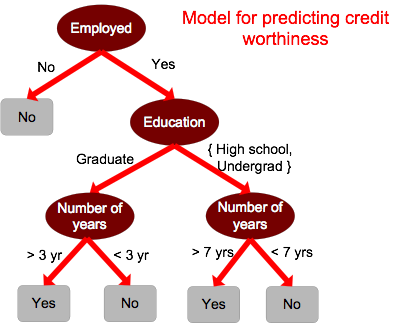

Answer:

Steve is NOT credit worthy because even though he is employed and has a high school degree, he spent LESS than 7 years at his current address, which deemed him unworthy of the credit.

Andy is also NOT credit worthy because even though he has a graduate degree and spent more than 3 years at his current address, he is NOT employed, which deemed him unworthy of the credit.

4. What type of feature are the following (categorical-nominal, categorical-ordinal, numerical-discrete, numerical-continuous):
    - Person height
    - Ranking of a product
    - Number of children
    - Car model

Answer:

Person height: categorical-ordinal (if assigned as tall, meduim, short) or numerical-continuous (if assigned as real numbers).

Ranking of a product: categorical-ordinal. 

Number of children: numerical-discrete

Car model: categorical-nominal. 

5. What is the purpose of Information Retrieval

Answer:

Information retrieval provides organizations with immediate value. While it is important to try and figure out methods to capture tacit knowledge, information retrieval can provide a way to get at information that already exist electronically.

6. Use the california housing prices dataset and do the following:

    - Remove the ocean_proximity feature
    - Standardaize the features.
    - Remove the outliers.
    - Remove the missing values (if any).
    - Remove the duplicate rows (if any).
    - Apply PCA and reduce the dimensions to 2.
    - Do a scatter plot for the data on the two principal components.
    

In [ ]:
import pandas as p
cal=p.read_csv('../input/california-housing-prices/housing.csv')

# Remove the ocean_proximity feature

cal = cal.drop(['ocean_proximity'],axis=1)
print(cal.head())

In [ ]:
# Remove missing values

print("Number of rows before removing the missing data:")
print(cal.shape[0])
cal=cal.dropna()
print("Number of rows after removing the missing data:")
print(cal.shape[0])

In [ ]:
# Remove the outliers in the price feature if there is any

QL1=cal.quantile(0.25)
QL3=cal.quantile(0.75)
IQRL=QL3-QL1
FLL=QL1-(1.5*IQRL)
FHL=QL3+(1.5*IQRL)
cal=cal.loc[(cal>FLL).all(axis=1) & (cal<FHL).all(axis=1)]
print("Number of rows after removing the outliers in the price feature:")
print(cal.shape[0])

In [ ]:
# Find any duplicate rows and remove them

calc = cal.duplicated()
print('Number of duplicate rows = %d' % (calc.sum()))
cal=cal.drop_duplicates()
print("Number of rows after removing the duplicate data:")
print(cal.shape[0])

In [ ]:
# Standardaize the features

from sklearn.preprocessing import StandardScaler
x = cal.iloc[:, :].values
y = cal.iloc[:,].values
x = StandardScaler().fit_transform(x)
x
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
print(p.DataFrame(data = x, columns = features).head())

In [ ]:
# Apply PCA and reduce the dimensions to 2

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalComponents
principalDf = p.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print(principalDf.head())

In [ ]:
# Do a scatter plot for the data on the two principal components.

# Note: code looks different than the code shown in the class tutorial because the data of this example is quantitative while the data shown in the class tutorial were categorical

import plotly.express as pl
plot = pl.scatter(principalDf, x='principal component 1', y='principal component 2').update_traces(marker=dict(color='blue'))
plot.show()

7. Use the pfizer-vaccine-tweets dataset and do the following on the tweet text feature:

    - Remove any punctuation.
    - Remove the stop words.
    - Apply stemming and lemmatization.
    - Vectorize the text of the tweets and put it in a dataframe with applying the TF_IDF weights.
    - Find the similarity between the tweets and the query "vaccine is deadly".
    - Print the top 10 most similar tweets to the query in the order of similarity.

In [ ]:
import pandas as p
ds=p.read_csv('../input/pfizer-vaccine-tweets/vaccination_tweets.csv')

# Remove any punctuation

import string
punc = "\n\r"+string.punctuation
ds['text'] = ds['text'].str.translate(str.maketrans('', '', punc))  
print(ds['text'].head())

In [ ]:
# Remove the stop words

from nltk.corpus import stopwords
s = stopwords.words('english')
ds['text'] = ds["text"].str.lower().str.split()
ds['text'] = ds['text'].apply(lambda n: ' '.join([i for i in n if i not in s]))

In [ ]:
# Apply stemming and lemmatization

import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def tokenize(str_input):  
    words = re.sub(r"(?u)[^A-Za-z]", " ", str_input).lower().split(" ")
    words = [stemmer.stem(word) for word in words if len(word)>2]
    words = [wordnet_lemmatizer.lemmatize(word) for word in words if len(word)>2]
    return words
vectorizer = TfidfVectorizer(tokenizer=tokenize)
vectors = vectorizer.fit_transform(ds['text'])
feature_names = vectorizer.get_feature_names()

In [ ]:
# Vectorize the text of the tweets and put it in a dataframe with applying the TF_IDF weights

df = p.DataFrame(vectors.toarray(),columns=feature_names)
print(df.head())

In [ ]:
# Find the similarity between the tweets and the query "vaccine is deadly"

q="vaccine is deadly"
q2=vectorizer.transform([q])
q3=p.DataFrame(q2.toarray(), columns=feature_names)
from sklearn.metrics.pairwise import cosine_similarity
cosinesim = cosine_similarity(df, q3)
print(cosinesim)

In [ ]:
# Print the top 10 most similar tweets to the query in the order of similarity

import numpy as n
cossim = cosinesim.flatten()
par = n.argpartition(cossim, -10)[-10:]
sort = par[n.argsort(cossim[par])]
sim = cossim[sort]
sim2 = ds['text'].iloc[sort]
simten = p.DataFrame({'similarity': sim, 'text': sim2}).reset_index(drop=True)
simten2 = simten.sort_values(by='similarity', ascending=False)
print(simten2)